In [2]:
library(tidyverse)
library(ggplot2)
library(patchwork)
library(geneBasisR)
library(Seurat)
library(wesanderson)
library(ggcorrplot)
library(ggpubr)
library(SingleCellExperiment)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Attaching SeuratObject

Attaching sp

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘matrixStats’


The following object is masked from ‘package:dplyr’:

    count



Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, co

In [311]:
run_name = 'litgenes_all_n1xo_nosct__select_batch.cell_class___eval.neuron_1xo__predict.polar_label__eval_batch.none'
# lib_stat_path = paste0('_targets/objects/lib_stat_batched_litgenes_all_n1xo_nosct__select_batch.none___eval.other__predict.polar_label__eval_batch.none')
lib_stat_path = paste0('_targets/objects/lib_stat_batched_reranked_', run_name)
lib_stat = qs::qread(lib_stat_path)

In [312]:
# lib_stat_path = paste0('_targets/objects/lib_stat_batched_', run_name)
# lib_stat = qs::qread(lib_stat_path)

In [313]:
sce_path = paste0('_targets/objects/sce_01_batched__TEMP_', run_name)
sce = qs::qread(sce_path)
sce

class: SingleCellExperiment 
dim: 5448 13594 
metadata(0):
assays(2): counts logcounts
rownames(5448): Pdgfra Bmp4 ... Casp8 Abca12
rowData names(0):
colnames(13594): TTCTAGTGTTAACCTG_3_3 AAGCCATCACTGGACC_1_3 ...
  AGGTTGTAGGCTAGCA_2_1 GCCGATGTCATCCTGC_2_2
colData names(39): orig.ident nCount_RNA ... nFeature_integrated ident
reducedDimNames(2): PCA UMAP
mainExpName: SCT
altExpNames(2): RNA integrated

In [475]:
# run_name = 'gs85_litgenes_other__select_batch.none___eval.other__predict.polar_label__eval_batch.none'
# # lib_stat_path = paste0('_targets/objects/lib_stat_batched_litgenes_all_n1xo_nosct__select_batch.none___eval.other__predict.polar_label__eval_batch.none')
# lib_stat_path = paste0('_targets/objects/lib_stat_gs85_', run_name)
# lib_stat = qs::qread(lib_stat_path)
# sce_path = paste0('_targets/objects/sce_01_gs85_evaluate__TEMP_', run_name)
# sce = qs::qread(sce_path)

run_name = 'gs97_litgenes_other__select_batch.none___eval.all_n1xo__predict.polar_label__eval_batch.none'
# lib_stat_path = paste0('_targets/objects/lib_stat_batched_litgenes_all_n1xo_nosct__select_batch.none___eval.other__predict.polar_label__eval_batch.none')
lib_stat_path = paste0('_targets/objects/lib_stat_gs97_', run_name)
lib_stat = qs::qread(lib_stat_path)
sce_path = paste0('_targets/objects/sce_01_gs97_evaluate__TEMP_', run_name)
sce = qs::qread(sce_path)



In [476]:
meta = colData(sce) %>% data.frame %>% select(labels, polar_label, cell_class)

In [477]:
plot_cell_preservation_score = function(sce, lib_stat, n_genes_total, column){
    meta = colData(sce) %>% data.frame %>% select(labels, polar_label, cell_class)
    cell_score_stat = lib_stat$cell_score_stat[lib_stat$cell_score_stat$n_genes == n_genes_total , ]
    rownames(cell_score_stat) = cell_score_stat$cell
    cell_score_stat = left_join(rownames_to_column(cell_score_stat), rownames_to_column(meta)) %>% column_to_rownames
    column = ensym(column)
    p = ggplot(cell_score_stat , aes(x = !!column, y = cell_score, fill = !!column)) + 
      geom_boxplot() + 
      theme_classic() + 
      labs(y = "Cell neighborhood preservation score" , x = "# genes") + 
      theme(legend.position = "none") + 
      theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5)) +
      ylim(0,1)
    p
}

In [478]:
options(repr.plot.width=15, repr.plot.height=5)
p10 = plot_cell_preservation_score(sce, lib_stat, 10, "polar_label") + ggtitle(paste0('n_genes=', 10))
p20 = plot_cell_preservation_score(sce, lib_stat, 20, "polar_label") + ggtitle(paste0('n_genes=', 20))
p30 = plot_cell_preservation_score(sce, lib_stat, 30, "polar_label") + ggtitle(paste0('n_genes=', 30))
p40 = plot_cell_preservation_score(sce, lib_stat, 40, "polar_label") + ggtitle(paste0('n_genes=', 40))
p50 = plot_cell_preservation_score(sce, lib_stat, 50, "polar_label") + ggtitle(paste0('n_genes=', 50))
p60 = plot_cell_preservation_score(sce, lib_stat, 60, "polar_label") + ggtitle(paste0('n_genes=', 60))
p70 = plot_cell_preservation_score(sce, lib_stat, 70, "polar_label") + ggtitle(paste0('n_genes=', 70))
p80 = plot_cell_preservation_score(sce, lib_stat, 80, "polar_label") + ggtitle(paste0('n_genes=', 80))
p90 = plot_cell_preservation_score(sce, lib_stat, 90, "polar_label") + ggtitle(paste0('n_genes=', 90))
p100 = plot_cell_preservation_score(sce, lib_stat, 100, "polar_label") + ggtitle(paste0('n_genes=', 100))


Joining, by = "rowname"
Joining, by = "rowname"
Joining, by = "rowname"
Joining, by = "rowname"
Joining, by = "rowname"
Joining, by = "rowname"
Joining, by = "rowname"
Joining, by = "rowname"
Joining, by = "rowname"
Joining, by = "rowname"


In [479]:
layout <- c(area(1, 1, 1, 1),
            area(2, 1, 2, 1),
            area(3, 1, 3, 1),
            area(4, 1, 4, 1),
            area(5, 1, 5, 1),
            area(1, 2, 1, 2),
            area(2, 2, 2, 2),
            area(3, 2, 3, 2),
            area(4, 2, 4, 2),
            area(5, 2, 5, 2))

Warning message:
“Removed 535 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 167 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 46 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 12 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 5 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 1 rows containing non-finite values (stat_boxplot).”


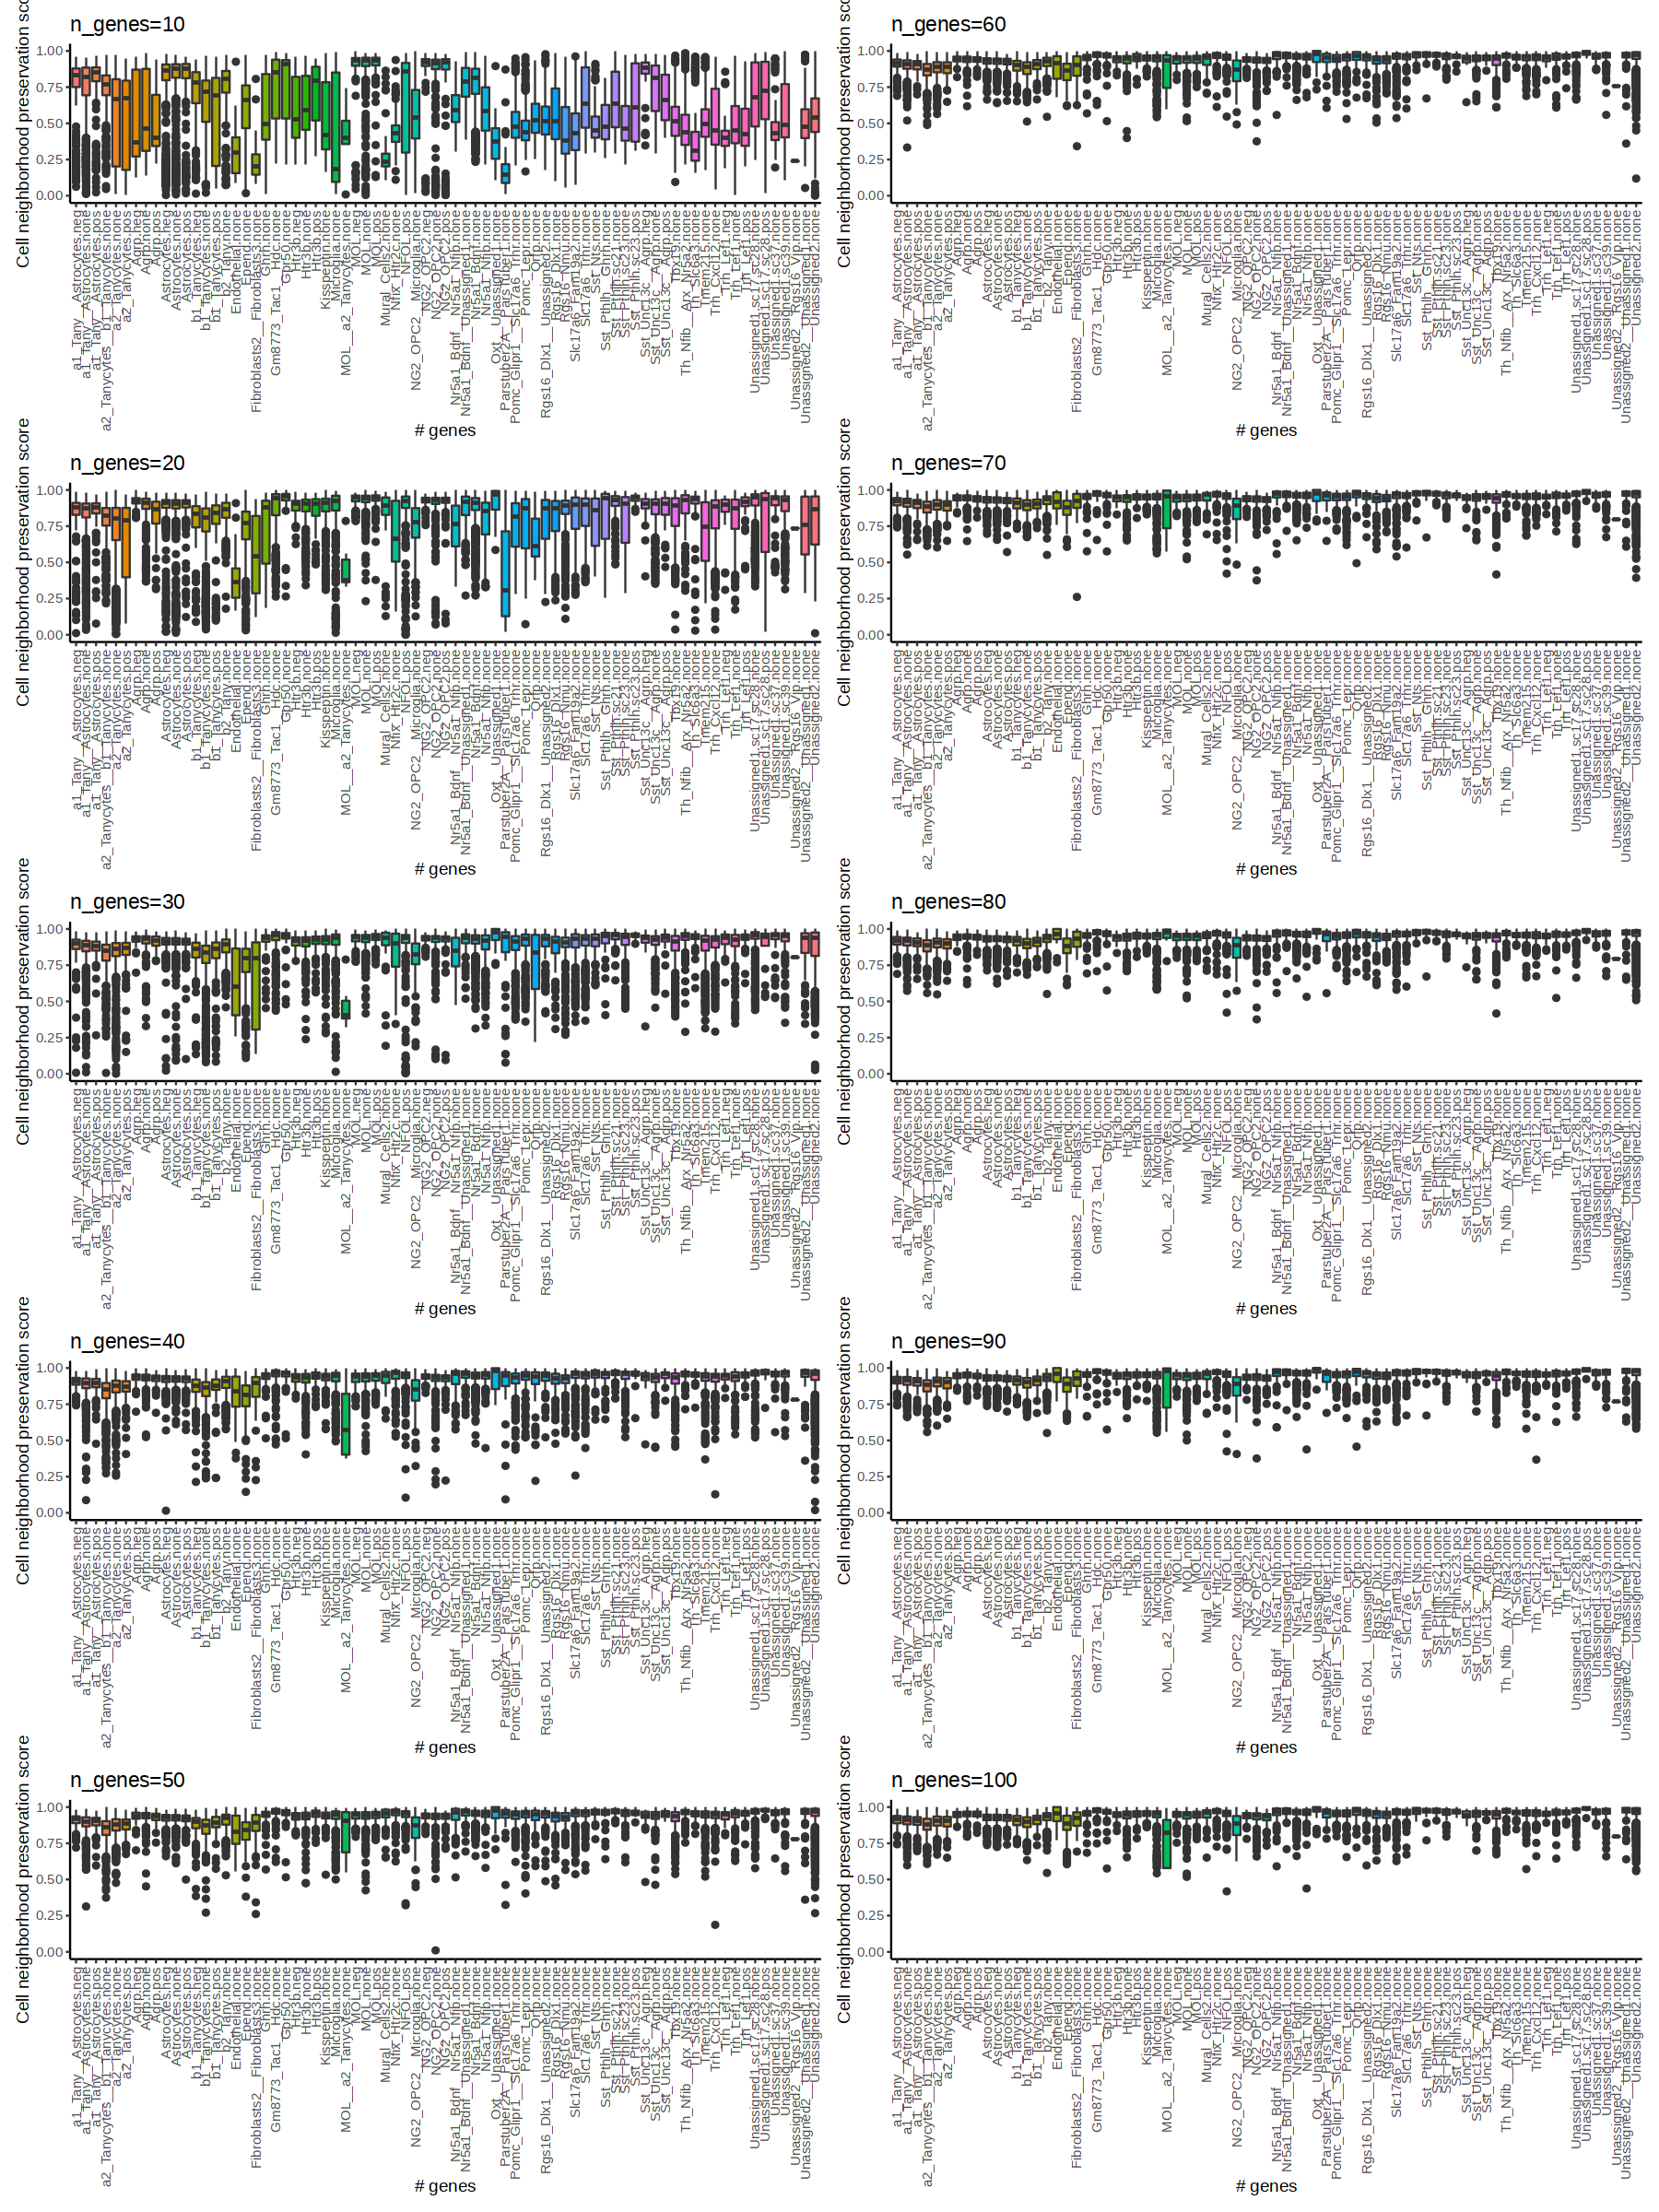

In [480]:
options(repr.plot.width=15, repr.plot.height=20)
p10 + p20 + p30 + p40 + p50 + p60 + p70 + p80 + p90 + p100 +
  plot_layout(design = layout)

In [481]:
cell_score_stat = lib_stat$cell_score_stat
cell_score_stat$rowname = cell_score_stat$cell
meta = colData(sce) %>% data.frame %>% select(labels, polar_label, cell_class)
meta = meta %>% rownames_to_column %>% tibble
cell_score_stat = full_join(cell_score_stat, meta)
cell_score_stat

Joining, by = "rowname"


cell,cell_score,n_genes,rowname,labels,polar_label,cell_class
<chr>,<dbl>,<fct>,<chr>,<chr>,<chr>,<chr>
AAACCCAAGACCATTC_4_3_1,0.5974239,10,AAACCCAAGACCATTC_4_3_1,Unassigned1.sc17.sc28,Unassigned1.sc17.sc28.none,neuron
AAACCCAAGAGTAACT_2_1_1,0.7214164,10,AAACCCAAGAGTAACT_2_1_1,Unassigned1.sc17.sc28,Unassigned1.sc17.sc28.none,neuron
AAACCCAAGATGACAT_2_2_1,0.3130202,10,AAACCCAAGATGACAT_2_2_1,Agrp,Agrp.none,neuron
AAACCCAAGTACAGCG_5_1_1,0.7204192,10,AAACCCAAGTACAGCG_5_1_1,Nfix_Htr2c,Nfix_Htr2c.none,neuron
AAACCCACAAGACCGA_5_3_1,0.5302762,10,AAACCCACAAGACCGA_5_3_1,Unassigned2,Unassigned2.none,neuron
AAACCCACACGTAGAG_4_3_2,0.6061809,10,AAACCCACACGTAGAG_4_3_2,a2_Tanycytes,a2_Tanycytes.none,other
AAACCCACAGCGAACA_2_1_2,0.7037127,10,AAACCCACAGCGAACA_2_1_2,Astrocytes,Astrocytes.none,other
AAACCCACATACAGCT_1_1_1,0.4800916,10,AAACCCACATACAGCT_1_1_1,Sst_Pthlh.sc21,Sst_Pthlh.sc21.none,neuron
AAACCCAGTACGATTC_2_1_1,0.3589661,10,AAACCCAGTACGATTC_2_1_1,Sst_Nts,Sst_Nts.none,neuron


In [482]:
mean_cst_by_ng_summary = cell_score_stat %>% 
group_by(n_genes) %>%
summarise(mean_cell_score = mean(cell_score)) %>%
mutate(n_genes = as.integer(n_genes))
mean_cst_by_ng_summary

n_genes,mean_cell_score
<int>,<dbl>
1,0.6363073
2,0.8188380
3,0.8811476
4,0.9109896
5,0.9215732
6,0.9289592
7,0.9335444
8,0.9354994
9,0.9357600


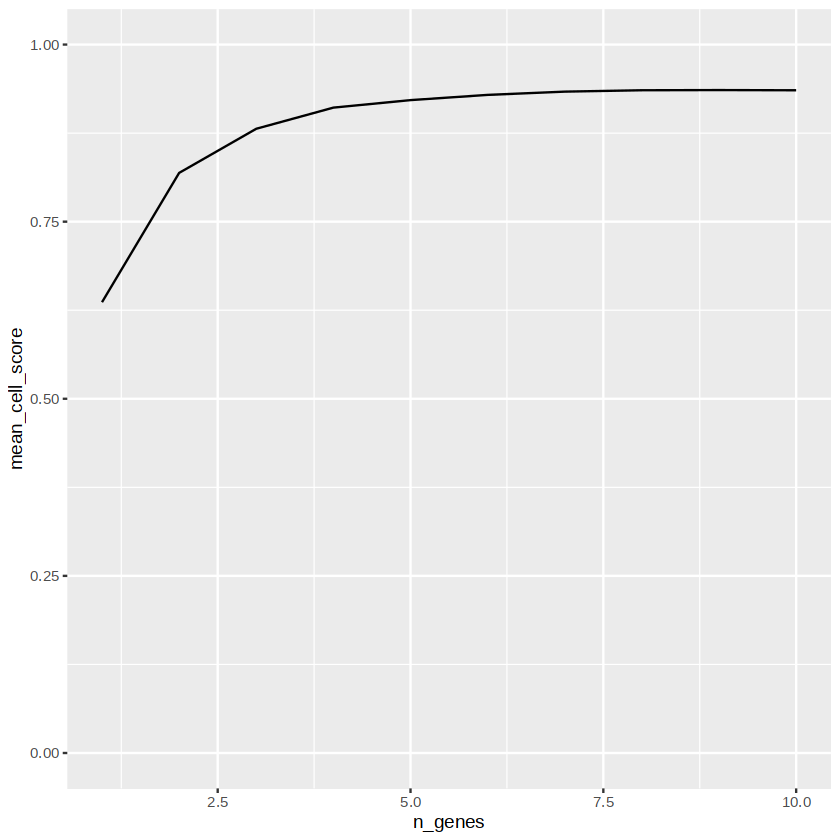

In [483]:
options(repr.plot.width=7, repr.plot.height=7)
p = ggplot(mean_cst_by_ng_summary, aes(x=n_genes, y=mean_cell_score)) +
  geom_line()  +
      ylim(0,1)
p

In [484]:
group_label = rlang::sym("polar_label")
cell_score_stat %>% 
group_by(!!group_label) %>%
summarise(cell_score)

`summarise()` has grouped output by 'polar_label'. You can override using the
`.groups` argument.


polar_label,cell_score
<chr>,<dbl>
a1_Tany__Astrocytes.neg,0.81348091
a1_Tany__Astrocytes.neg,0.75086476
a1_Tany__Astrocytes.neg,-0.02274603
a1_Tany__Astrocytes.neg,0.89997112
a1_Tany__Astrocytes.neg,0.86902323
a1_Tany__Astrocytes.neg,0.77196843
a1_Tany__Astrocytes.neg,0.81931482
a1_Tany__Astrocytes.neg,0.47805456
a1_Tany__Astrocytes.neg,0.29296169


In [485]:
lib_stat$celltype_stat %>% head

,celltype,frac_correctly_mapped,n_genes
,<chr>,<dbl>,<fct>
1,a1_Tany__Astrocytes.neg,0.01764706,10
2,a1_Tany__Astrocytes.none,0.16538132,10
3,a1_Tany__Astrocytes.pos,0.03819444,10
4,a2_Tanycytes__b1_Tanycytes.none,0.69686411,10
5,a2_Tanycytes.none,0.34495830,10
6,a2_Tanycytes.pos,0.04743083,10


In [486]:
celltype_stat = lib_stat$celltype_stat %>%
group_by(n_genes) %>%
summarise(mean_frac_correctly_mapped = mean(frac_correctly_mapped)) %>%
mutate(n_genes = as.integer(as.character(n_genes)))
celltype_stat

n_genes,mean_frac_correctly_mapped
<int>,<dbl>
10,0.2823677
20,0.5308757
30,0.6164558
40,0.6739345
50,0.6932552
60,0.7097379
70,0.7192744
80,0.7184032
90,0.7211473


In [487]:
celltype_stat

n_genes,mean_frac_correctly_mapped
<int>,<dbl>
10,0.2823677
20,0.5308757
30,0.6164558
40,0.6739345
50,0.6932552
60,0.7097379
70,0.7192744
80,0.7184032
90,0.7211473


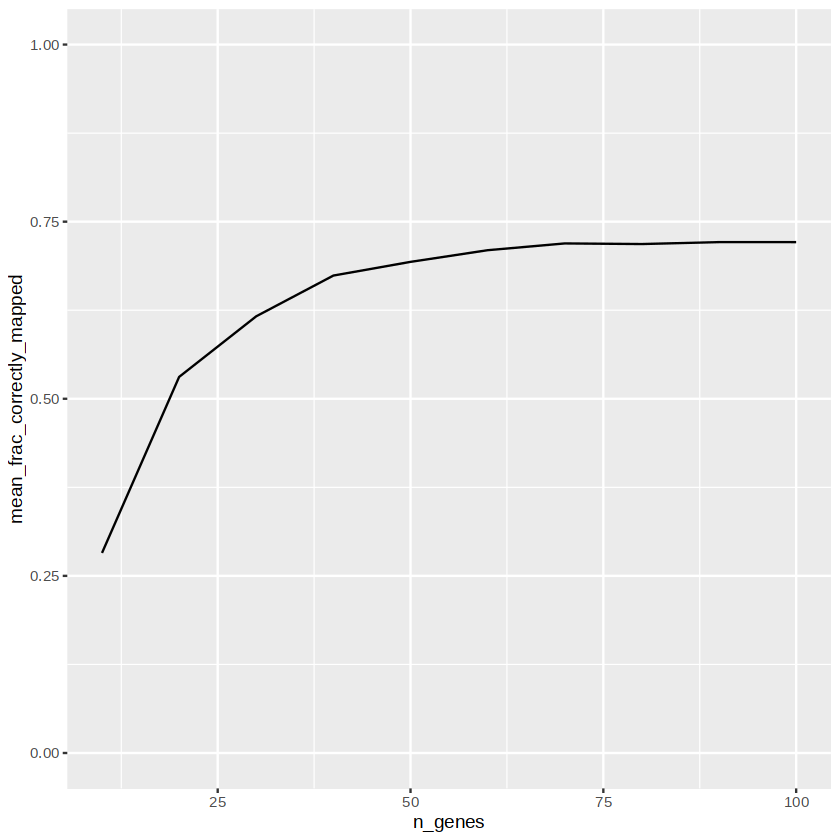

In [488]:
options(repr.plot.width=7, repr.plot.height=7)
p = ggplot(celltype_stat, aes(x=n_genes, y=mean_frac_correctly_mapped)) +
  geom_line()  +
      ylim(0,1)
p

In [489]:
options(repr.plot.width=10, repr.plot.height=10)
plot_path = paste0('_targets/objects/plotof_ctm_100_batched_reranked_', run_name)
p = qs::qread(plot_path)
p

ERROR: Error in qs::qread(plot_path): Failed to open _targets/objects/plotof_ctm_100_batched_reranked_gs97_litgenes_other__select_batch.none___eval.all_n1xo__predict.polar_label__eval_batch.none. Check file path.


In [ ]:
options(repr.plot.width=10, repr.plot.height=10)
plot_path = paste0('_targets/objects/plotof_ctm_100_gs85_', run_name)
p = qs::qread(plot_path)
p

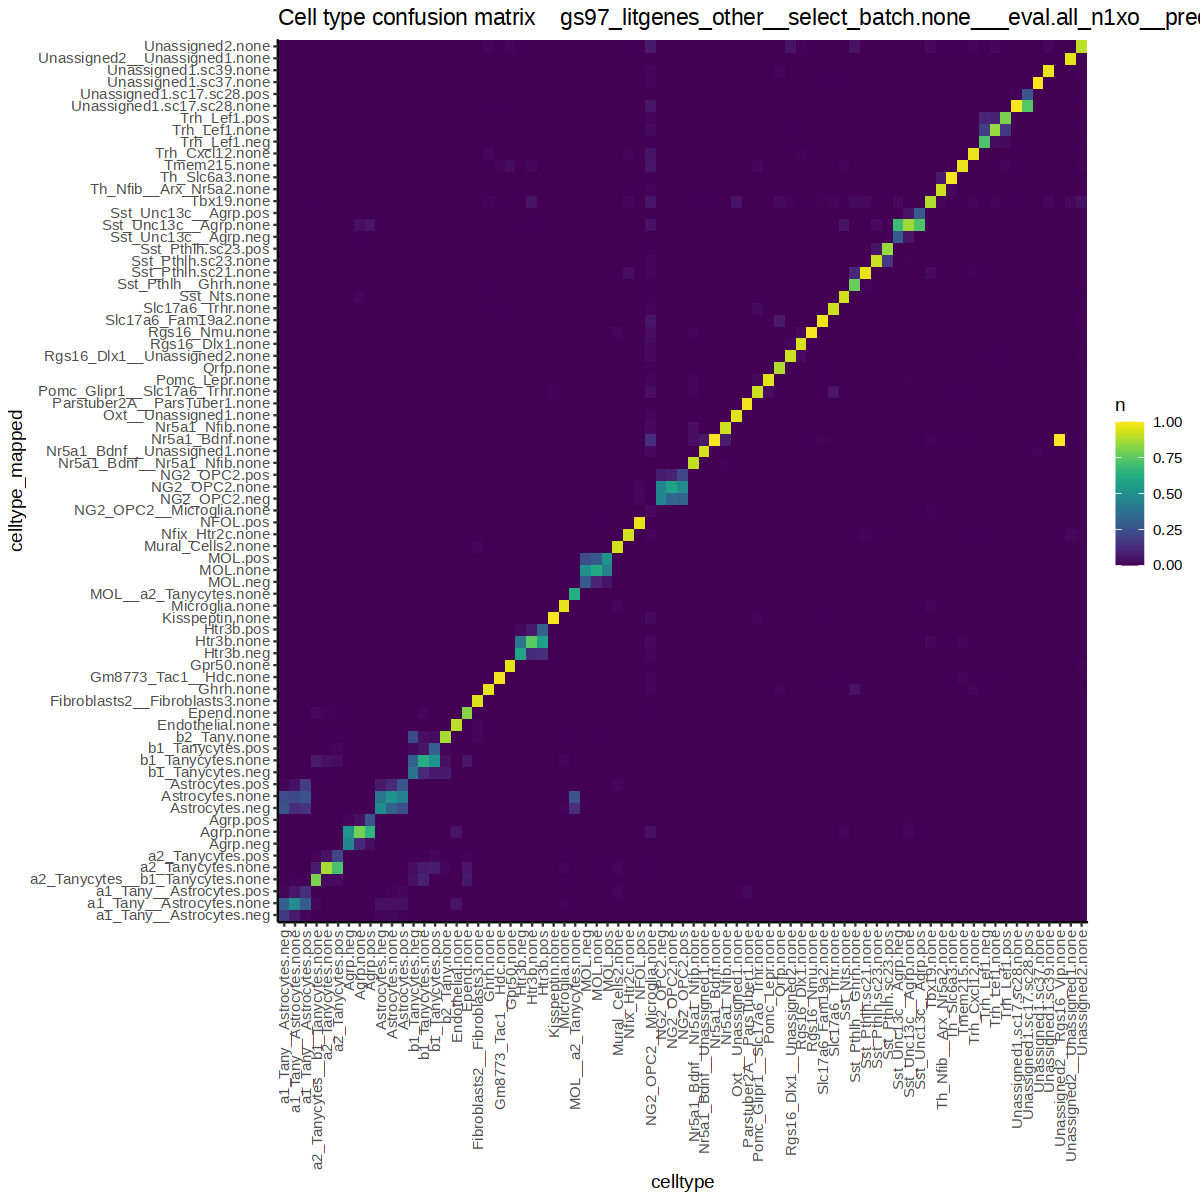

In [490]:
options(repr.plot.width=10, repr.plot.height=10)
plot_path = paste0('_targets/objects/plotof_ctm_100_gs97_', run_name)
p = qs::qread(plot_path)
p